In [1]:
import os
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
tf.__version__

'2.11.0'

In [3]:
big5 = pd.read_csv('./big5_scored.csv')

In [4]:
big5.head(5)

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34


In [5]:
E_df = big5.loc[:, "E1":"E10"]
E_df.loc[:,"score"] = big5.loc[:,"E_SC"]

c:\users\user\anaconda3\envs\mldl\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\user\anaconda3\envs\mldl\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [6]:
categorys = []
for val in E_df['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
E_df['C'] = categorys

c:\users\user\anaconda3\envs\mldl\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [7]:
E_df.head()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,1
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1


In [8]:
n_features = E_df.loc[:, "E1":"E10"]
target = E_df.pop('C')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(n_features, target, shuffle = False, train_size=0.8)
X_test = x_test.reset_index(drop=True)

In [10]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(x_train)

In [11]:
normalizer(x_train.iloc[:3])

<tf.Tensor: shape=(3, 10), dtype=float32, numpy=
array([[ 1.1177529 ,  0.5850355 ,  1.286567  ,  0.95662224,  1.2241367 ,
         1.1735576 ,  0.7969921 ,  0.288679  ,  1.3574251 ,  1.9850346 ],
       [-0.5061705 ,  0.5850355 , -0.32540873,  0.13651943, -0.32973522,
        -0.43395394, -1.2980866 , -1.2873504 , -1.5037984 , -1.0775287 ],
       [ 1.9297147 ,  1.3448085 , -1.9373845 , -0.6835834 ,  1.2241367 ,
         1.1735576 , -1.2980866 , -1.2873504 ,  1.3574251 ,  1.9850346 ]],
      dtype=float32)>

In [12]:
# Hyperparameters

batch_size = 32
epoch = 50

In [13]:
def get_baslc_model(normalizer = None, n1=2, n2=2):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(n1, activation = 'relu'),
        tf.keras.layers.Dense(n2, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
    
    model.compile(optimizer= 'SGD',
                 loss = tf.keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])
    return model

In [14]:
model = get_baslc_model(normalizer=normalizer, n1 = 20, n2 = 20)
model.fit(x_train, y_train,
          epochs = epoch, batch_size = batch_size)

Epoch 1/50
493/493 [==============================] - 1s 997us/step - loss: 0.3070 - accuracy: 0.9096
Epoch 2/50
493/493 [==============================] - 0s 963us/step - loss: 0.1165 - accuracy: 0.9649
Epoch 3/50
493/493 [==============================] - 1s 1ms/step - loss: 0.0730 - accuracy: 0.9797
Epoch 4/50
493/493 [==============================] - 0s 963us/step - loss: 0.0519 - accuracy: 0.9890
Epoch 5/50
493/493 [==============================] - 0s 957us/step - loss: 0.0399 - accuracy: 0.9941
Epoch 6/50
493/493 [==============================] - 0s 959us/step - loss: 0.0324 - accuracy: 0.9967
Epoch 7/50
493/493 [==============================] - 0s 958us/step - loss: 0.0272 - accuracy: 0.9978
Epoch 8/50
493/493 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9986
Epoch 9/50
493/493 [==============================] - 0s 939us/step - loss: 0.0203 - accuracy: 0.9991
Epoch 10/50
493/493 [==============================] - 0s 937us/step - loss: 0.0179 - 

In [15]:
y_pred = model.predict(X_test, batch_size= 1)

3944/3944 [==============================] - 3s 786us/step


In [16]:
y_pred_c = []
for i in y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    y_pred_c.append(val)

In [17]:
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != y_pred_c).sum()) / len(y_test)))

총 테스트 개수 : 3944, 오류개수 : 0
정확도 : 1.00


In [18]:
test_accuracy = (len(y_test) - (y_test != y_pred_c).sum()) / len(y_test)

In [19]:
X_test

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,5,5,5,5,4,5,5,5,5,4
1,2,3,4,1,4,3,3,1,1,2
2,1,4,3,4,3,3,2,3,3,1
3,4,5,4,3,4,4,5,4,5,4
4,2,1,3,3,2,2,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
3939,1,2,3,1,4,3,1,4,1,1
3940,2,3,2,3,2,3,2,2,4,2
3941,2,1,4,1,5,1,1,4,1,1
3942,1,2,2,3,2,2,1,3,4,1


In [20]:
shuffled_scores = {}

for feature in X_test.columns:
    copy = X_test.copy()
    random.shuffle(copy.loc[:, feature])
#     print(copy)
    shuffled_pred = model.predict(copy, batch_size = 1)
    
    shuffled_pred_c = []
    for i in shuffled_pred:
        if i < 0.5:
            val = 0
        else:
            val = 1
        shuffled_pred_c.append(val)
    
    shuffled_score = (len(y_test) - (y_test != shuffled_pred_c).sum()) / len(y_test)
    shuffled_scores[feature] = shuffled_score

print(shuffled_scores)

3944/3944 [==============================] - 3s 743us/step
{'E1': 0.9510649087221096, 'E2': 0.9546146044624746, 'E3': 0.9563894523326572, 'E4': 0.9556288032454361, 'E5': 0.9546146044624746, 'E6': 0.947261663286004, 'E7': 0.9432048681541582, 'E8': 0.9523326572008114, 'E9': 0.9424442190669371, 'E10': 0.9513184584178499}


In [21]:
print("Original Classfication Accuracy : %.4f"%(test_accuracy))
for n in range(len(X_test.columns)):
    print("%s high importance shuffled Accuracy : %s %.4f" %(n+1, sorted(shuffled_scores.items(), key=lambda item : item[1])[n][0], sorted(shuffled_scores.items(), key=lambda item : item[1])[n][1]))

Original Classfication Accuracy : 1.0000
1 high importance shuffled Accuracy : E9 0.9424
2 high importance shuffled Accuracy : E7 0.9432
3 high importance shuffled Accuracy : E6 0.9473
4 high importance shuffled Accuracy : E1 0.9511
5 high importance shuffled Accuracy : E10 0.9513
6 high importance shuffled Accuracy : E8 0.9523
7 high importance shuffled Accuracy : E2 0.9546
8 high importance shuffled Accuracy : E5 0.9546
9 high importance shuffled Accuracy : E4 0.9556
10 high importance shuffled Accuracy : E3 0.9564


### Plus, Minus

E1	I am the life of the party. (+)

E2	I don't talk a lot. (-)

E3	I feel comfortable around people. (+)

E4	I keep in the background. (-)

E5	I start conversations. (+)

E6	I have little to say. (-)

E7	I talk to a lot of different people at parties. (+)

E8	I don't like to draw attention to myself. (-)

E9	I don't mind being the center of attention. (+)

E10	I am quiet around strangers. (-)

3944/3944 [==============================] - 3s 707us/step
총 테스트 개수 : 3944, 오류개수 : 674
정확도 : 0.83


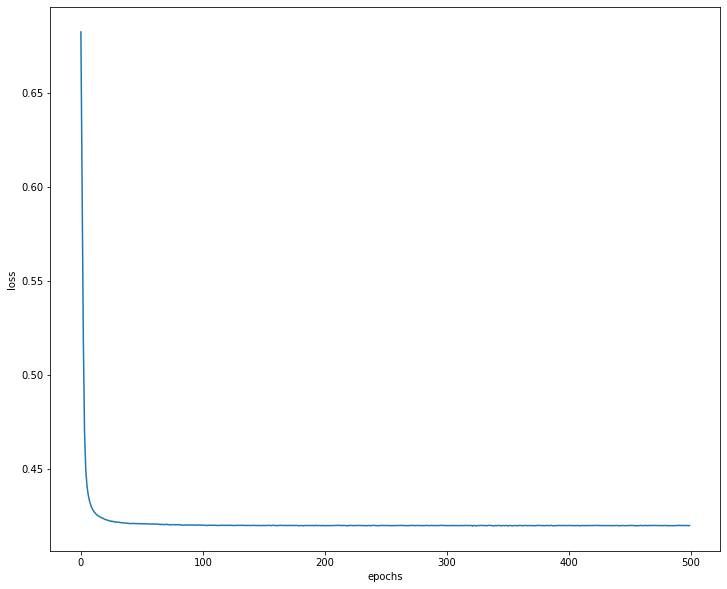

In [24]:
E2_x_train = x_train.loc[:, ["E9", "E6"]]
E2_x_test = x_test.loc[:, ["E9", "E6"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E2_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 2, n2 = 2)
hist = new_model.fit(E2_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E2_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 708us/step
총 테스트 개수 : 3944, 오류개수 : 674
정확도 : 0.83


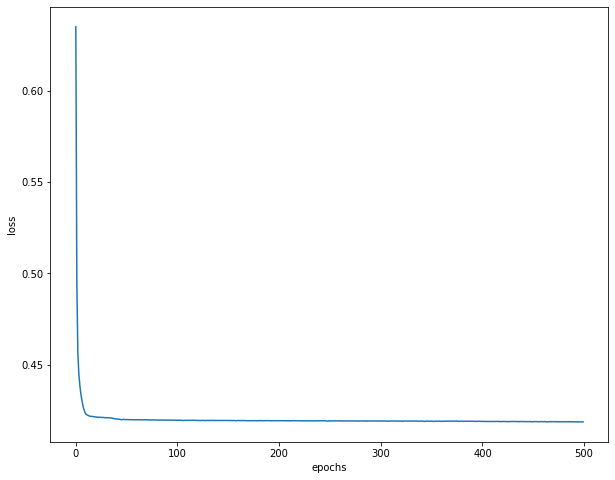

In [27]:
E2_x_train = x_train.loc[:, ["E9", "E6"]]
E2_x_test = x_test.loc[:, ["E9", "E6"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E2_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 4, n2 = 4)
hist = new_model.fit(E2_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E2_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 718us/step
총 테스트 개수 : 3944, 오류개수 : 686
정확도 : 0.83


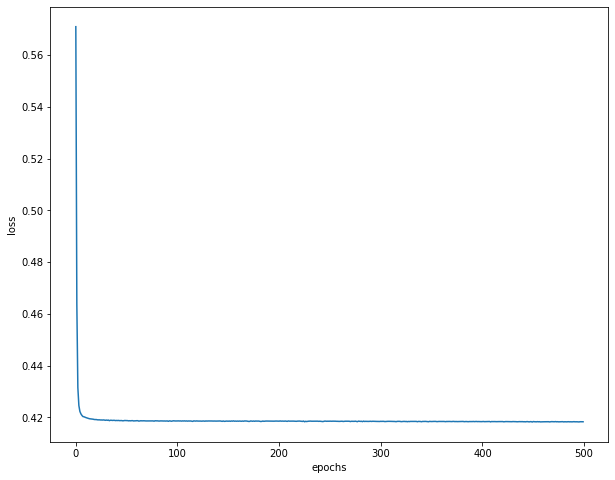

In [28]:
E2_x_train = x_train.loc[:, ["E9", "E6"]]
E2_x_test = x_test.loc[:, ["E9", "E6"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E2_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 6, n2 = 6)
hist = new_model.fit(E2_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E2_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 720us/step
총 테스트 개수 : 3944, 오류개수 : 343
정확도 : 0.91


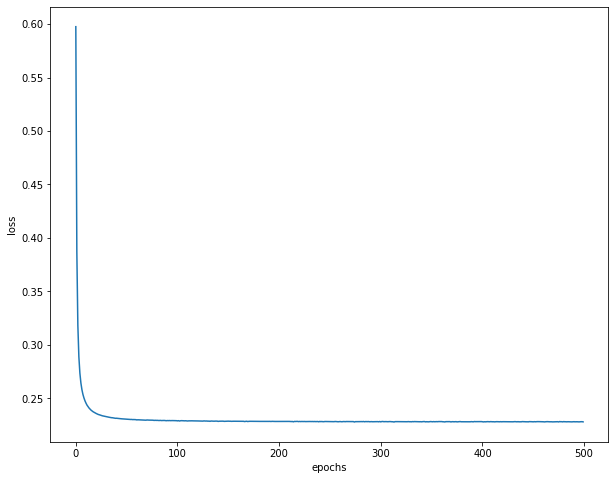

In [25]:
E4_x_train = x_train.loc[:, ["E9", "E6","E7", "E10"]]
E4_x_test = x_test.loc[:, ["E9", "E6", "E7", "E10"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E4_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 2, n2 = 2)
hist = new_model.fit(E4_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E4_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 715us/step
총 테스트 개수 : 3944, 오류개수 : 348
정확도 : 0.91


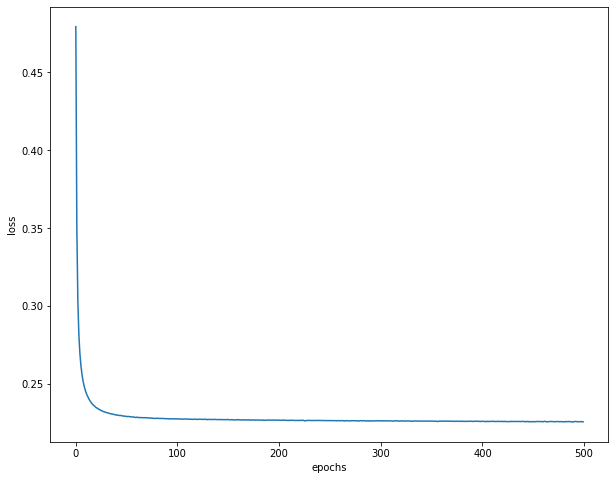

In [29]:
E4_x_train = x_train.loc[:, ["E9", "E6","E7", "E10"]]
E4_x_test = x_test.loc[:, ["E9", "E6", "E7", "E10"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E4_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 4, n2 = 4)
hist = new_model.fit(E4_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E4_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 743us/step
총 테스트 개수 : 3944, 오류개수 : 353
정확도 : 0.91


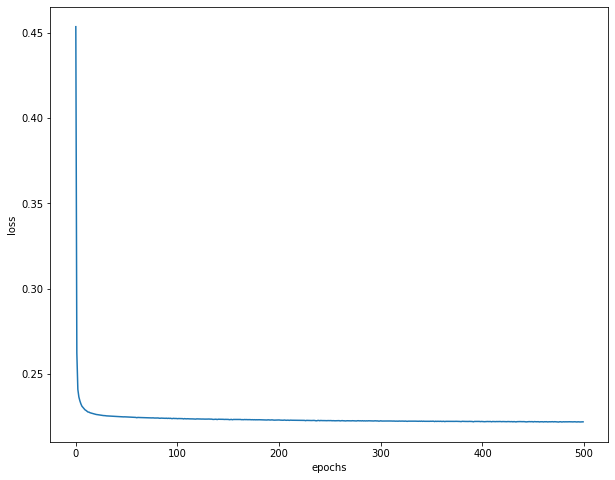

In [30]:
E4_x_train = x_train.loc[:, ["E9", "E6","E7", "E10"]]
E4_x_test = x_test.loc[:, ["E9", "E6", "E7", "E10"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E4_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1 = 8, n2 = 8)
hist = new_model.fit(E4_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E4_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 721us/step
총 테스트 개수 : 3944, 오류개수 : 263
정확도 : 0.93


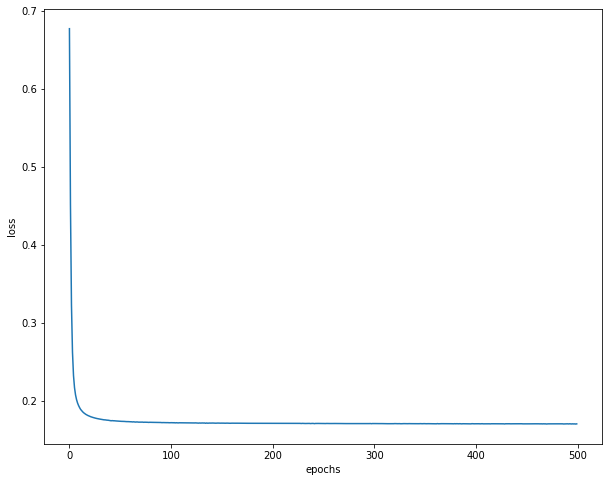

In [26]:
E6_x_train = x_train.loc[:, ["E9", "E6", "E7", "E10", "E1", "E8"]]
E6_x_test = x_test.loc[:, ["E9", "E6", "E7", "E10", "E1", "E8"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E6_x_train)

new_model = get_baslc_model(normalizer=new_normalizer)
hist = new_model.fit(E6_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E6_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

3944/3944 [==============================] - 3s 739us/step
총 테스트 개수 : 3944, 오류개수 : 270
정확도 : 0.93


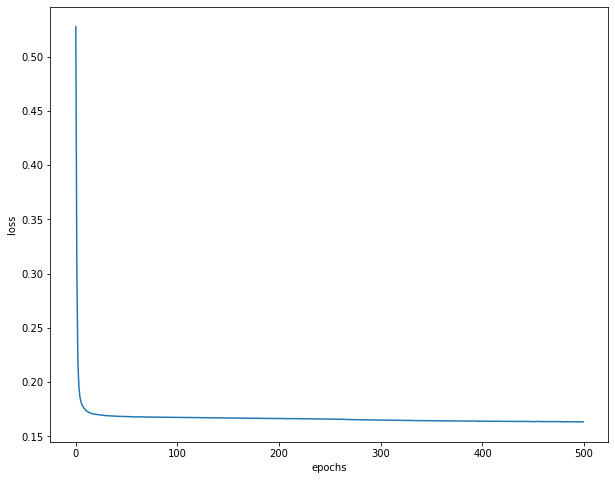

In [31]:
E6_x_train = x_train.loc[:, ["E9", "E6", "E7", "E10", "E1", "E8"]]
E6_x_test = x_test.loc[:, ["E9", "E6", "E7", "E10", "E1", "E8"]]

new_normalizer = tf.keras.layers.Normalization(axis = -1)
new_normalizer.adapt(E6_x_train)

new_model = get_baslc_model(normalizer=new_normalizer, n1= 8, n2 = 8)
hist = new_model.fit(E6_x_train, y_train, epochs = 500, batch_size = batch_size, verbose=0)

new_y_pred = new_model.predict(E6_x_test, batch_size= 1)

new_y_pred_c = []
for i in new_y_pred:
    if i < 0.5:
        val = 0
    else:
        val = 1
    new_y_pred_c.append(val)
    
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(y_test), (y_test != new_y_pred_c).sum()))
print('정확도 : %.2f' %((len(y_test) - (y_test != new_y_pred_c).sum()) / len(y_test)))

plt.figure(figsize = (10, 8))
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()